# EDA of review_data.csv

In [33]:
import pandas as pd
import numpy as np

In [34]:
# 데이터 로드
df = pd.read_csv('data/Coupang-reviews-homeplanet/review_data.csv')

In [35]:
df.head(5)

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.04,아아잉,5,NaN,NaN,0,0
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.03,정*준,5,NaN,NaN,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백경민,5,NaN,NaN,0,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백*수,3,NaN,NaN,0,0


In [36]:
# 데이터의 기본적인 정보 파악
print(f"데이터 크기: {df.shape}")
print(f"행(리뷰) 수: {df.shape[0]}")
print(f"열(컬럼) 수: {df.shape[1]}")

데이터 크기: (160856, 9)
행(리뷰) 수: 160856
열(컬럼) 수: 9


In [37]:
# 데이터의 컬럼 정보 확인
print("컬럼 정보:")
print(df.info())
print("컬럼별 데이터 타입:")
print(df.dtypes)

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160856 entries, 0 to 160855
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   상품명     160856 non-null  object
 1   구매상품명   160856 non-null  object
 2   작성일자    160856 non-null  object
 3   구매자명    160353 non-null  object
 4   평점      160856 non-null  int64 
 5   헤드라인    71038 non-null   object
 6   리뷰내용    97987 non-null   object
 7   도움수     160856 non-null  int64 
 8   이미지수    160856 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 11.0+ MB
None
컬럼별 데이터 타입:
상품명      object
구매상품명    object
작성일자     object
구매자명     object
평점        int64
헤드라인     object
리뷰내용     object
도움수       int64
이미지수      int64
dtype: object


결측값 분석
- 분석 결과 헤드라인과 리뷰내용 모두 결측값인 경우의 데이터가 60,274개로 전체 데이터의 약 30%를 차지
- 따라서 이 데이터들은 텍스트 리뷰 클러스터링 분석에서 제외한 후 따로 분석을 진행

In [38]:
# 각 컬럼별 결측값 개수 확인
print("=== 각 컬럼별 결측값 개수 ===")
missing_counts = df.isnull().sum()
print(missing_counts)
print()

# 결측값 비율 계산 (백분율로 표시)
print("=== 각 컬럼별 결측값 비율(%) ===")
missing_percentage = (df.isnull().sum() / len(df)) * 100
for col, pct in missing_percentage.items():
    print(f"{col}: {pct:.1f}%")
print()

# 특히 관심 있는 컬럼들 세부 분석
print("=== 주요 컬럼 결측값 상세 분석 ===")
print(f"헤드라인이 NaN인 리뷰 개수: {df['헤드라인'].isnull().sum()}")
print(f"리뷰내용이 NaN인 리뷰 개수: {df['리뷰내용'].isnull().sum()}")
print(f"헤드라인과 리뷰내용이 모두 NaN인 리뷰 개수: {((df['헤드라인'].isnull()) & (df['리뷰내용'].isnull())).sum()}")
print()

# 전체 데이터에서 완전한 리뷰(헤드라인 또는 리뷰내용 중 하나라도 있는 경우) 개수
complete_reviews = ((df['헤드라인'].notna()) | (df['리뷰내용'].notna())).sum()
print(f"텍스트 내용이 있는 리뷰 개수: {complete_reviews}")
print(f"텍스트 내용이 없는 리뷰 개수: {len(df) - complete_reviews}")

=== 각 컬럼별 결측값 개수 ===
상품명          0
구매상품명        0
작성일자         0
구매자명       503
평점           0
헤드라인     89818
리뷰내용     62869
도움수          0
이미지수         0
dtype: int64

=== 각 컬럼별 결측값 비율(%) ===
상품명: 0.0%
구매상품명: 0.0%
작성일자: 0.0%
구매자명: 0.3%
평점: 0.0%
헤드라인: 55.8%
리뷰내용: 39.1%
도움수: 0.0%
이미지수: 0.0%

=== 주요 컬럼 결측값 상세 분석 ===
헤드라인이 NaN인 리뷰 개수: 89818
리뷰내용이 NaN인 리뷰 개수: 62869
헤드라인과 리뷰내용이 모두 NaN인 리뷰 개수: 60274

텍스트 내용이 있는 리뷰 개수: 100582
텍스트 내용이 없는 리뷰 개수: 60274


평점 분포 분석
- 평점은 1점부터 5점까지 있으며, 각 평점별 리뷰 개수와 비율을 계산
- 평점 중 고평가(4-5점)와 저평가(1-2점)의 비율을 분석한 결과 대부분의 데이터가 고평가에 해당함을 알 수 있음
- 리뷰를 쓴 사람들은 별점을 후하게 준다는 사실을 인지

In [39]:
# 평점의 기본 통계량 확인
print("=== 평점 기본 통계량 ===")
print(df['평점'].describe())
print()

# 평점별 개수와 비율 계산
print("=== 평점별 리뷰 개수 및 비율 ===")
rating_counts = df['평점'].value_counts().sort_index()
rating_percentages = df['평점'].value_counts(normalize=True).sort_index() * 100

for rating in sorted(df['평점'].unique()):
    count = rating_counts[rating]
    percentage = rating_percentages[rating]
    print(f"{rating}점: {count}개 ({percentage:.1f}%)")
print()

# 평점의 분포 특성 분석
print("=== 평점 분포 특성 ===")
print(f"평균 평점: {df['평점'].mean():.2f}")
print(f"중간값(median): {df['평점'].median():.1f}")
print(f"최빈값(mode): {df['평점'].mode().iloc[0]}")
print(f"표준편차: {df['평점'].std():.2f}")
print()

# 고평점(4-5점)과 저평점(1-2점) 비율
high_ratings = df[df['평점'] >= 4].shape[0]
low_ratings = df[df['평점'] <= 2].shape[0]
total_reviews = len(df)

print(f"고평점(4-5점) 리뷰: {high_ratings}개 ({high_ratings/total_reviews*100:.1f}%)")
print(f"중간평점(3점) 리뷰: {df[df['평점'] == 3].shape[0]}개 ({df[df['평점'] == 3].shape[0]/total_reviews*100:.1f}%)")
print(f"저평점(1-2점) 리뷰: {low_ratings}개 ({low_ratings/total_reviews*100:.1f}%)")

=== 평점 기본 통계량 ===
count    160856.000000
mean          4.738872
std           0.749505
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: 평점, dtype: float64

=== 평점별 리뷰 개수 및 비율 ===
1점: 3222개 (2.0%)
2점: 1869개 (1.2%)
3점: 4724개 (2.9%)
4점: 14061개 (8.7%)
5점: 136980개 (85.2%)

=== 평점 분포 특성 ===
평균 평점: 4.74
중간값(median): 5.0
최빈값(mode): 5
표준편차: 0.75

고평점(4-5점) 리뷰: 151041개 (93.9%)
중간평점(3점) 리뷰: 4724개 (2.9%)
저평점(1-2점) 리뷰: 5091개 (3.2%)


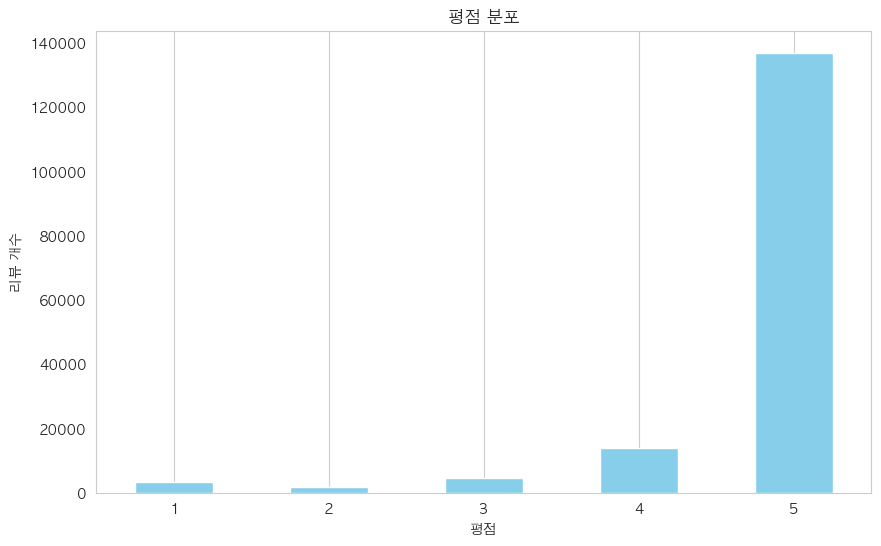

<Figure size 1200x800 with 0 Axes>

In [55]:
# 평점 분포 시각화
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# 평점 분포 시각화
plt.figure(figsize=(10, 6))
df['평점'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 이미지 저장
plt.savefig('img/score_distribution.png', dpi=300, bbox_inches='tight')


도움 수 분석

In [40]:
# 도움수의 기본 통계량 확인
print("=== 도움수 기본 통계량 ===")
print(df['도움수'].describe())
print()

# 도움수 분포 상세 분석
print("=== 도움수 분포 상세 분석 ===")
print(f"도움수가 0인 리뷰: {(df['도움수'] == 0).sum()}개 ({(df['도움수'] == 0).sum()/len(df)*100:.1f}%)")
print(f"도움수가 1 이상인 리뷰: {(df['도움수'] > 0).sum()}개 ({(df['도움수'] > 0).sum()/len(df)*100:.1f}%)")
print()

# 도움수별 리뷰 개수 (상위 10개만 표시)
help_counts = df['도움수'].value_counts().sort_index()
print("=== 도움수별 리뷰 개수 (상위 10개) ===")
for help_num in sorted(df['도움수'].unique())[:10]:
    count = help_counts[help_num]
    print(f"도움수 {help_num}: {count}개")
print()

# 도움수가 높은 리뷰들의 특성 분석
if df['도움수'].max() > 0:
    print("=== 도움수가 높은 리뷰들의 특성 ===")
    # 도움수 상위 10% 리뷰들
    top_10_percent_threshold = df['도움수'].quantile(0.9)
    helpful_reviews = df[df['도움수'] >= top_10_percent_threshold]

    print(f"도움수 상위 10% 기준값: {top_10_percent_threshold}")
    print(f"상위 10% 리뷰 개수: {len(helpful_reviews)}")

    if len(helpful_reviews) > 0:
        print(f"상위 10% 리뷰들의 평균 평점: {helpful_reviews['평점'].mean():.2f}")
        print("상위 10% 리뷰들의 평점 분포:")
        for rating in sorted(helpful_reviews['평점'].unique()):
            count = (helpful_reviews['평점'] == rating).sum()
            print(f"  {rating}점: {count}개")
else:
    print("=== 모든 리뷰의 도움수가 0입니다 ===")
    print("이는 최근에 올라온 리뷰들이거나, 아직 다른 사용자들의 평가를 받지 못한 리뷰들일 가능성이 높습니다.")

=== 도움수 기본 통계량 ===
count    160856.000000
mean          2.116663
std           7.262188
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         685.000000
Name: 도움수, dtype: float64

=== 도움수 분포 상세 분석 ===
도움수가 0인 리뷰: 107604개 (66.9%)
도움수가 1 이상인 리뷰: 53252개 (33.1%)

=== 도움수별 리뷰 개수 (상위 10개) ===
도움수 0: 107604개
도움수 1: 13031개
도움수 2: 8210개
도움수 3: 5944개
도움수 4: 4514개
도움수 5: 3623개
도움수 6: 2835개
도움수 7: 2365개
도움수 8: 1948개
도움수 9: 1499개

=== 도움수가 높은 리뷰들의 특성 ===
도움수 상위 10% 기준값: 6.0
상위 10% 리뷰 개수: 17930
상위 10% 리뷰들의 평균 평점: 4.85
상위 10% 리뷰들의 평점 분포:
  1점: 272개
  2점: 52개
  3점: 212개
  4점: 1012개
  5점: 16382개


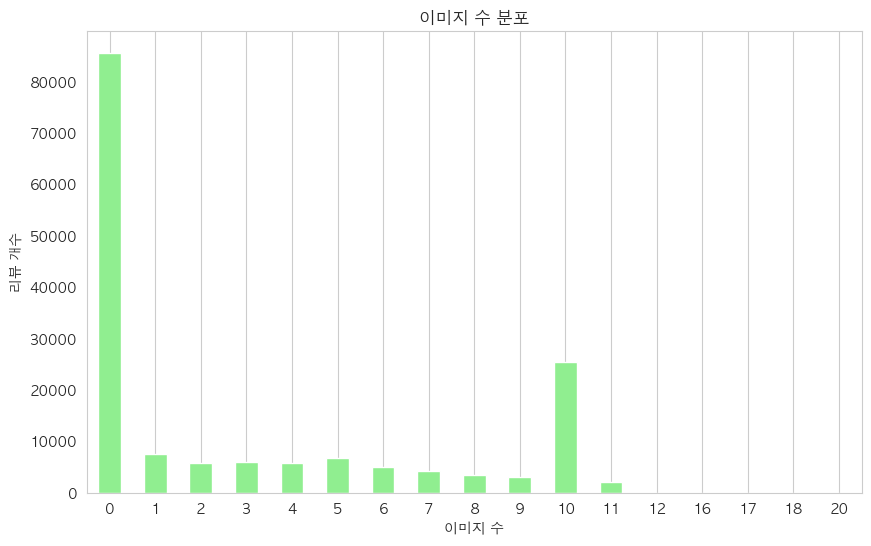

<Figure size 1200x800 with 0 Axes>

In [56]:
# 이미지 수 시각화
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# 이미지 수 분포 시각화
plt.figure(figsize=(10, 6))
df['이미지수'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('이미지 수 분포')
plt.xlabel('이미지 수')
plt.ylabel('리뷰 개수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
plt.savefig('img/image_distribution.png', dpi=300, bbox_inches='tight')


이미지 수 분석

In [41]:
# 이미지수의 기본 통계량 확인
print("=== 이미지수 기본 통계량 ===")
print(df['이미지수'].describe())
print()

# 이미지수 분포 상세 분석
print("=== 이미지수 분포 상세 분석 ===")
print(f"이미지가 없는 리뷰(0개): {(df['이미지수'] == 0).sum()}개 ({(df['이미지수'] == 0).sum()/len(df)*100:.1f}%)")
print(f"이미지가 있는 리뷰(1개 이상): {(df['이미지수'] > 0).sum()}개 ({(df['이미지수'] > 0).sum()/len(df)*100:.1f}%)")
print()

# 이미지수별 리뷰 개수 확인
image_counts = df['이미지수'].value_counts().sort_index()
print("=== 이미지수별 리뷰 개수 ===")
for img_num in sorted(df['이미지수'].unique()):
    count = image_counts[img_num]
    percentage = count/len(df)*100
    print(f"이미지 {img_num}개: {count}개 ({percentage:.1f}%)")
print()

# 이미지가 있는 리뷰들의 특성 분석
if df['이미지수'].max() > 0:
    print("=== 이미지가 있는 리뷰들의 특성 ===")
    reviews_with_images = df[df['이미지수'] > 0]

    print(f"이미지가 있는 리뷰 개수: {len(reviews_with_images)}")
    print(f"이미지가 있는 리뷰들의 평균 평점: {reviews_with_images['평점'].mean():.2f}")
    print(f"이미지가 없는 리뷰들의 평균 평점: {df[df['이미지수'] == 0]['평점'].mean():.2f}")
    print()

    print("이미지가 있는 리뷰들의 평점 분포:")
    for rating in sorted(reviews_with_images['평점'].unique()):
        count = (reviews_with_images['평점'] == rating).sum()
        total_with_images = len(reviews_with_images)
        print(f"  {rating}점: {count}개 ({count/total_with_images*100:.1f}%)")

    # 이미지가 있는 리뷰의 텍스트 내용 유무 확인
    print()
    print("=== 이미지가 있는 리뷰의 텍스트 내용 분석 ===")
    reviews_with_images_and_text = reviews_with_images[
        (reviews_with_images['헤드라인'].notna()) | (reviews_with_images['리뷰내용'].notna())
    ]
    print(f"이미지가 있으면서 텍스트 내용도 있는 리뷰: {len(reviews_with_images_and_text)}개")
    print(f"이미지만 있고 텍스트가 없는 리뷰: {len(reviews_with_images) - len(reviews_with_images_and_text)}개")

else:
    print("=== 모든 리뷰에 이미지가 없습니다 ===")
    print("이는 해당 상품의 리뷰어들이 텍스트만으로 리뷰를 작성했거나,")
    print("이미지 업로드가 제한적인 환경임을 의미할 수 있습니다.")

=== 이미지수 기본 통계량 ===
count    160856.000000
mean          3.027832
std           3.968304
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          20.000000
Name: 이미지수, dtype: float64

=== 이미지수 분포 상세 분석 ===
이미지가 없는 리뷰(0개): 85579개 (53.2%)
이미지가 있는 리뷰(1개 이상): 75277개 (46.8%)

=== 이미지수별 리뷰 개수 ===
이미지 0개: 85579개 (53.2%)
이미지 1개: 7593개 (4.7%)
이미지 2개: 5823개 (3.6%)
이미지 3개: 5941개 (3.7%)
이미지 4개: 5835개 (3.6%)
이미지 5개: 6685개 (4.2%)
이미지 6개: 5086개 (3.2%)
이미지 7개: 4148개 (2.6%)
이미지 8개: 3529개 (2.2%)
이미지 9개: 3082개 (1.9%)
이미지 10개: 25466개 (15.8%)
이미지 11개: 2079개 (1.3%)
이미지 12개: 3개 (0.0%)
이미지 16개: 1개 (0.0%)
이미지 17개: 1개 (0.0%)
이미지 18개: 1개 (0.0%)
이미지 20개: 4개 (0.0%)

=== 이미지가 있는 리뷰들의 특성 ===
이미지가 있는 리뷰 개수: 75277
이미지가 있는 리뷰들의 평균 평점: 4.81
이미지가 없는 리뷰들의 평균 평점: 4.68

이미지가 있는 리뷰들의 평점 분포:
  1점: 1189개 (1.6%)
  2점: 568개 (0.8%)
  3점: 1346개 (1.8%)
  4점: 5175개 (6.9%)
  5점: 66999개 (89.0%)

=== 이미지가 있는 리뷰의 텍스트 내용 분석 ===
이미지가 있으면서 텍스트 내용도 있는 리뷰: 74882개
이미지만 있고 텍스트가 없는 리뷰: 395개


In [42]:
# 데이터 규모 및 품질 요약
print("데이터 규모 및 품질")
print(f"• 총 리뷰 개수: {len(df):,}개")

# 텍스트 완성도
text_complete = ((df['헤드라인'].notna()) | (df['리뷰내용'].notna())).sum()
print(f"• 텍스트 내용이 있는 리뷰: {text_complete:,}개 ({text_complete/len(df)*100:.1f}%)")
print(f"• 텍스트가 없는 리뷰: {len(df)-text_complete:,}개 ({(len(df)-text_complete)/len(df)*100:.1f}%)")
print()

# 고객 만족도 분석
print("고객 만족도 분석")
print(f"• 평균 평점: {df['평점'].mean():.2f}/5.0")
print(f"• 최빈 평점: {df['평점'].mode().iloc[0]}점")

# 평점 분포
high_rating = (df['평점'] >= 4).sum()
mid_rating = (df['평점'] == 3).sum()
low_rating = (df['평점'] <= 2).sum()

print(f"• 고평점(4-5점): {high_rating:,}개 ({high_rating/len(df)*100:.1f}%)")
print(f"• 중간평점(3점): {mid_rating:,}개 ({mid_rating/len(df)*100:.1f}%)")
print(f"• 저평점(1-2점): {low_rating:,}개 ({low_rating/len(df)*100:.1f}%)")
print()

# 3. 리뷰 참여도 분석
print("리뷰 참여도 분석")
reviews_with_help = (df['도움수'] > 0).sum()
reviews_with_images = (df['이미지수'] > 0).sum()

print(f"• 도움수를 받은 리뷰: {reviews_with_help:,}개 ({reviews_with_help/len(df)*100:.1f}%)")
print(f"• 이미지가 있는 리뷰: {reviews_with_images:,}개 ({reviews_with_images/len(df)*100:.1f}%)")
print(f"• 평균 도움수: {df['도움수'].mean():.1f}개")
print(f"• 평균 이미지수: {df['이미지수'].mean():.1f}개")

# 참여도가 높은 리뷰의 특성
if reviews_with_help > 0 or reviews_with_images > 0:
    engaged_reviews = df[(df['도움수'] > 0) | (df['이미지수'] > 0)]
    print(f"• 참여도가 높은 리뷰의 평균 평점: {engaged_reviews['평점'].mean():.2f}")
print()


# 결측값 현황 분석
print("결측값 현황 분석")
headline_missing = df['헤드라인'].isnull().sum()
content_missing = df['리뷰내용'].isnull().sum()
both_missing = ((df['헤드라인'].isnull()) & (df['리뷰내용'].isnull())).sum()

print(f"• 헤드라인 누락: {headline_missing:,}개 ({headline_missing/len(df)*100:.1f}%)")
print(f"• 리뷰내용 누락: {content_missing:,}개 ({content_missing/len(df)*100:.1f}%)")
print(f"• 텍스트 완전 누락: {both_missing:,}개 ({both_missing/len(df)*100:.1f}%)")


데이터 규모 및 품질
• 총 리뷰 개수: 160,856개
• 텍스트 내용이 있는 리뷰: 100,582개 (62.5%)
• 텍스트가 없는 리뷰: 60,274개 (37.5%)

고객 만족도 분석
• 평균 평점: 4.74/5.0
• 최빈 평점: 5점
• 고평점(4-5점): 151,041개 (93.9%)
• 중간평점(3점): 4,724개 (2.9%)
• 저평점(1-2점): 5,091개 (3.2%)

리뷰 참여도 분석
• 도움수를 받은 리뷰: 53,252개 (33.1%)
• 이미지가 있는 리뷰: 75,277개 (46.8%)
• 평균 도움수: 2.1개
• 평균 이미지수: 3.0개
• 참여도가 높은 리뷰의 평균 평점: 4.79

결측값 현황 분석
• 헤드라인 누락: 89,818개 (55.8%)
• 리뷰내용 누락: 62,869개 (39.1%)
• 텍스트 완전 누락: 60,274개 (37.5%)
